# Avocado Project

In [142]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file


# Import Dataset

In [143]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [144]:
# Droping Unamed Column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [145]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [146]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [147]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
4905,28-08-2016,1.33,421583.74,150624.23,225695.86,5537.68,39725.97,39589.51,5.90,130.56,conventional,2016,Sacramento
4583,06-11-2016,1.25,92657.44,24892.26,27433.78,1137.26,39194.14,34250.04,4944.10,0.00,conventional,2016,Pittsburgh
14323,10-01-2016,1.38,63163.21,20245.33,5601.24,0.00,37316.64,36780.47,536.17,0.00,organic,2016,SouthCentral
18109,25-02-2018,2.11,24475.48,9731.20,11686.51,0.00,3057.77,3057.77,0.00,0.00,organic,2018,SanFrancisco
17870,18-02-2018,1.88,88854.41,9009.79,35316.20,0.00,44528.42,44519.43,8.99,0.00,organic,2018,LosAngeles


# Exploratory Data Analysis

In [148]:
df.shape

(18249, 13)

In [149]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [151]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: >

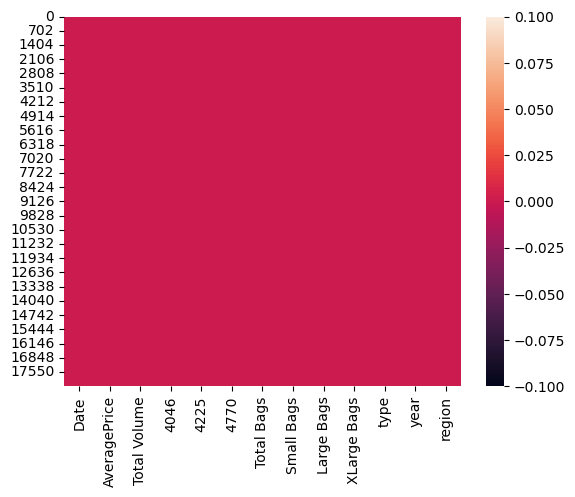

In [152]:
sns.heatmap(df.isnull())

In [153]:
df2=df.copy()

In [154]:
# removing date, type, year, region for subplot 
df2.drop(['Date','type','region','year'], axis=1, inplace=True)

In [155]:
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


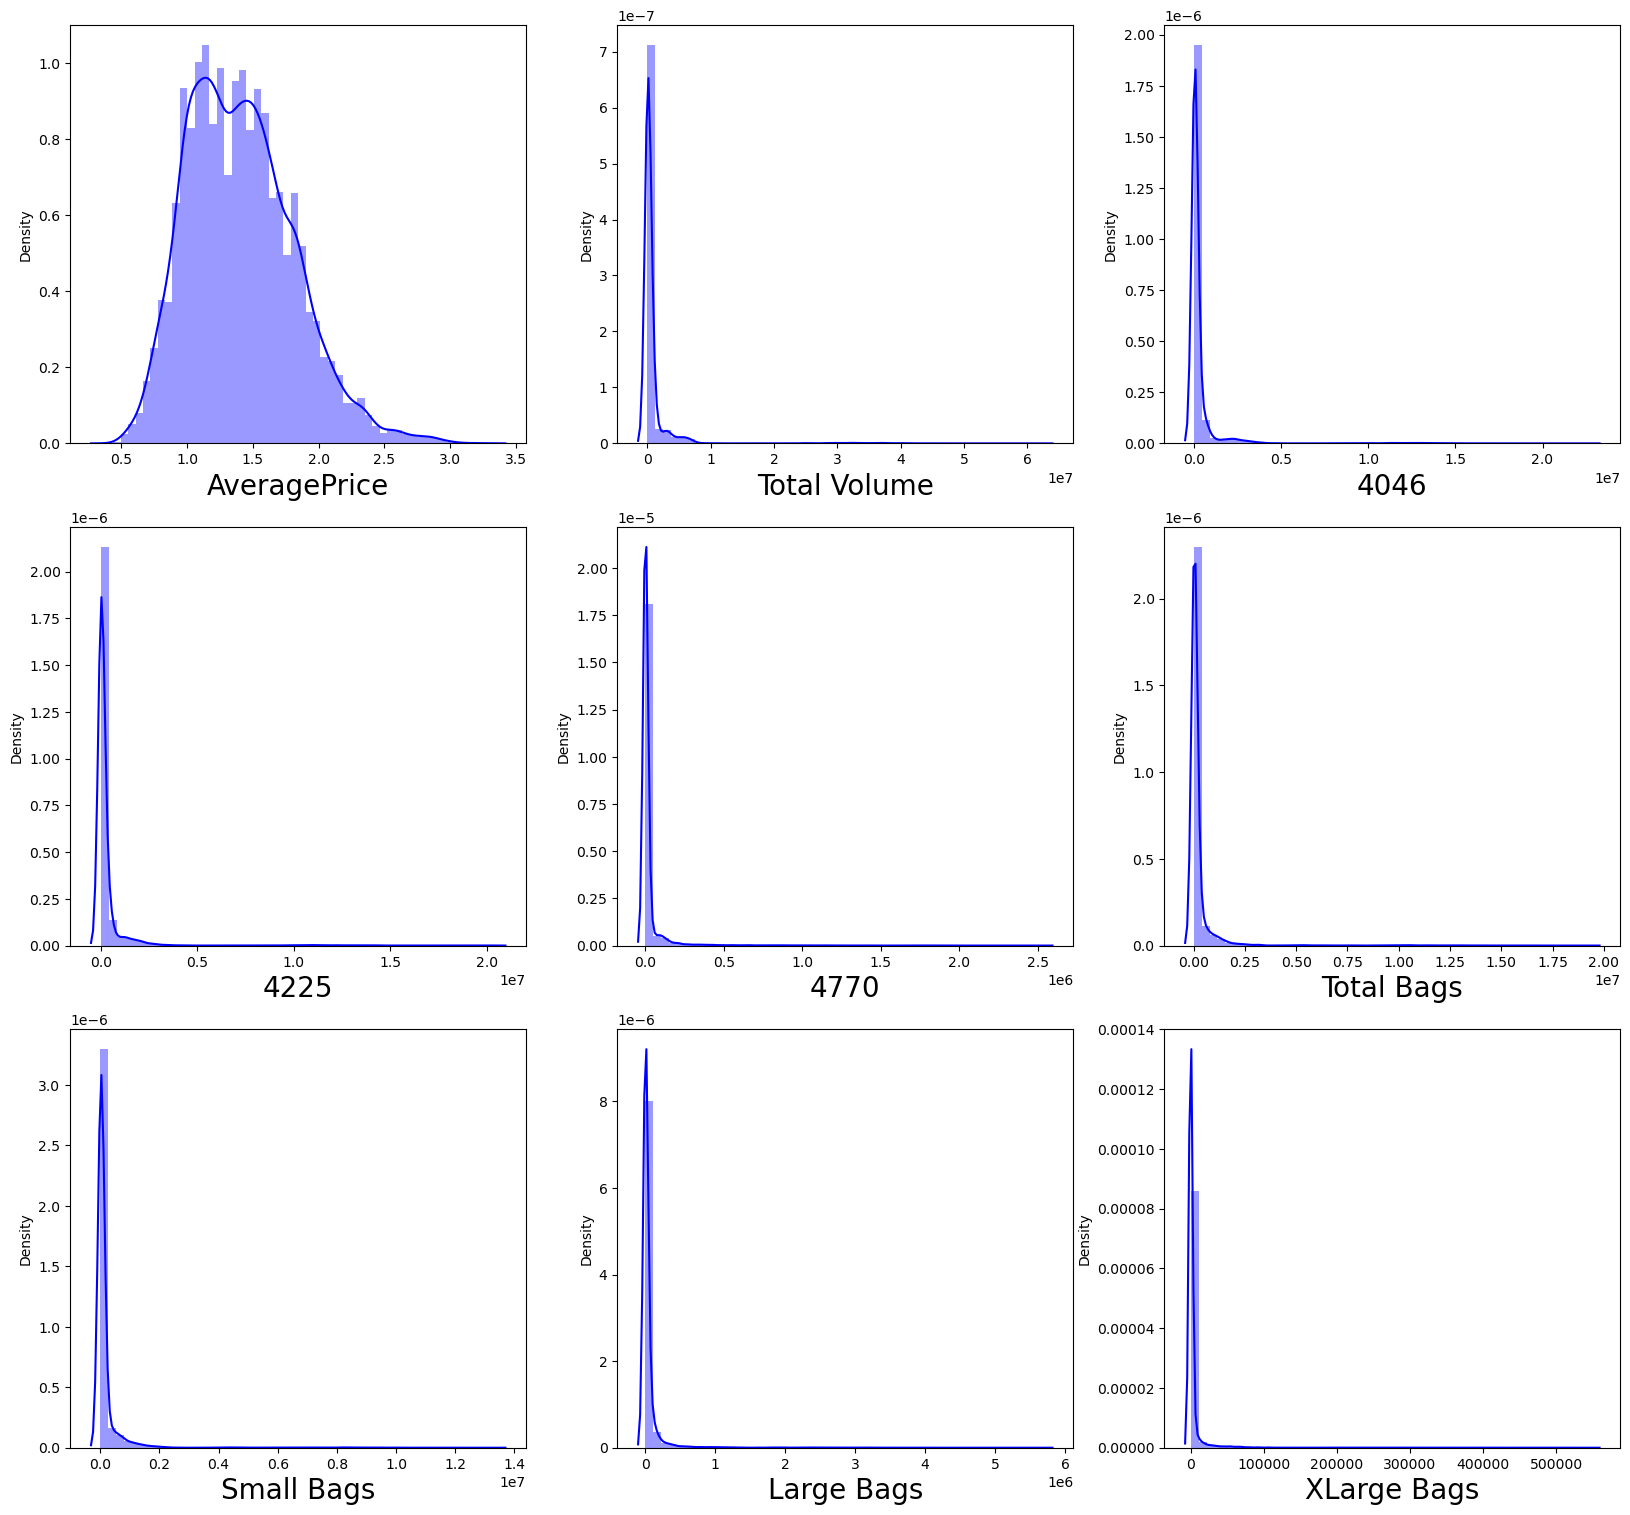

In [156]:
# Subplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df2[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

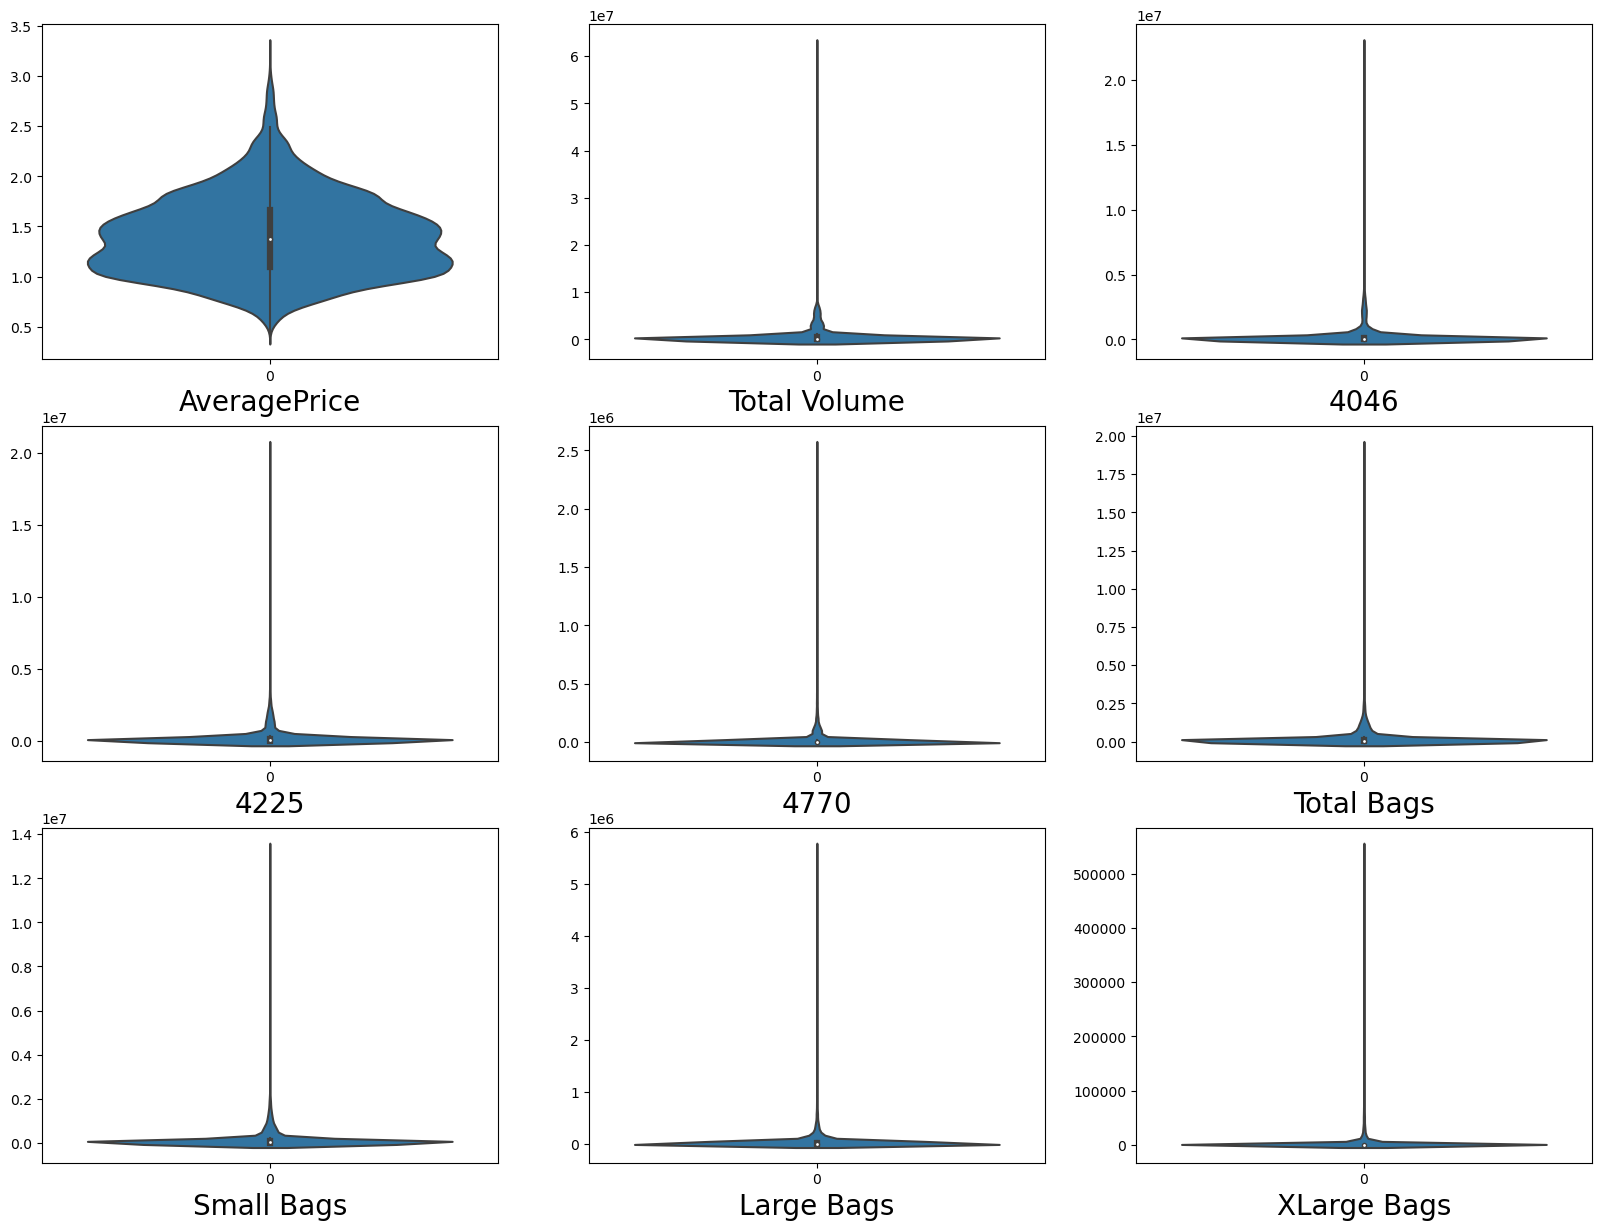

In [157]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [158]:
# We taking another dataframe for countplot doing in year and month wise 
df3=df.copy()

In [159]:
df3['Year'],df3['Month'],df3['Day']=df3['Date'].str.split('-').str
df3.drop(columns=['Date','Year'], inplace=True)
df3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,02,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,01,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,01,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,01,2018


In [160]:
# we only want month not remove day 
df3.drop(columns=['Day'],axis=1, inplace=True)

In [161]:
df3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,02
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,01
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,01
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,01


In [162]:
df3['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<Axes: xlabel='year', ylabel='count'>

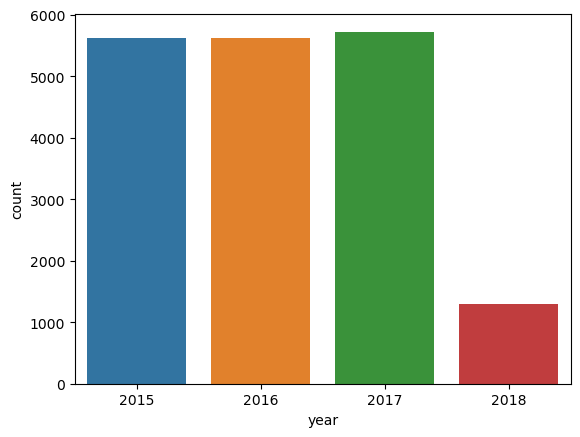

In [163]:
# Countplot
sns.countplot(x='year',data=df3)

Maximum sales lead comes in year of 2017

<Axes: xlabel='Month', ylabel='count'>

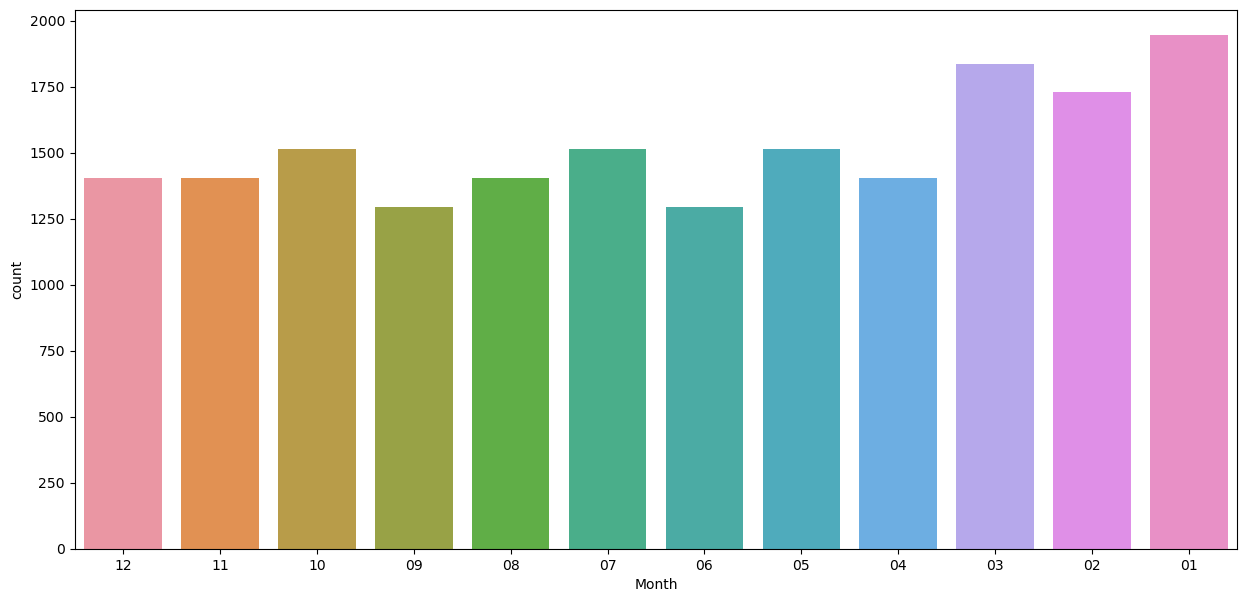

In [164]:
# Cheaking month wise sales entries
plt.figure(figsize=(15,7))
sns.countplot(x='Month', data=df3)

Maximum sales lead comes in month of Jan, Feb, March

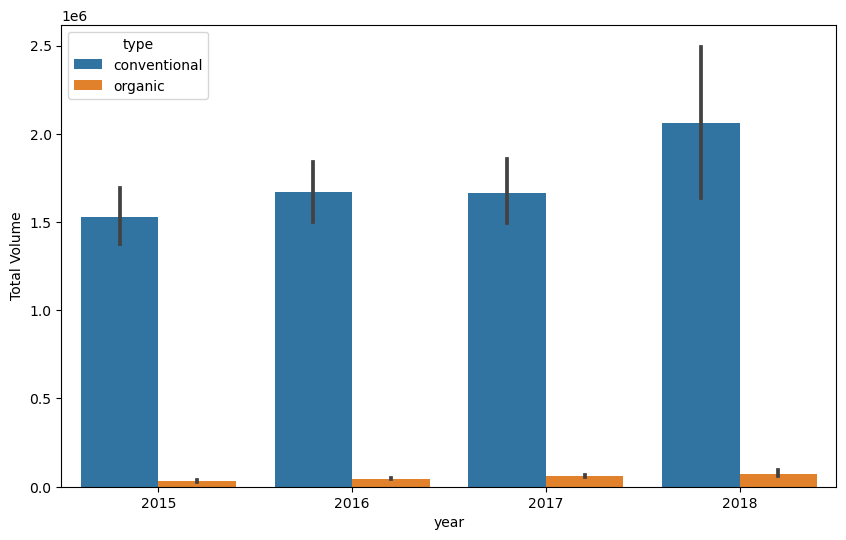

In [165]:
# checking type in year and total volumes
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df)
plt.show()

The sell of organic avacodo is less than 3%. 
Conventional Avacado are in more demand.
Barplot confirm same thing in yearwise sales volume.

array([[<Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>,
        <Axes: title={'center': '4046'}>],
       [<Axes: title={'center': '4225'}>,
        <Axes: title={'center': '4770'}>,
        <Axes: title={'center': 'Total Bags'}>],
       [<Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>,
        <Axes: title={'center': 'XLarge Bags'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >, <Axes: >]],
      dtype=object)

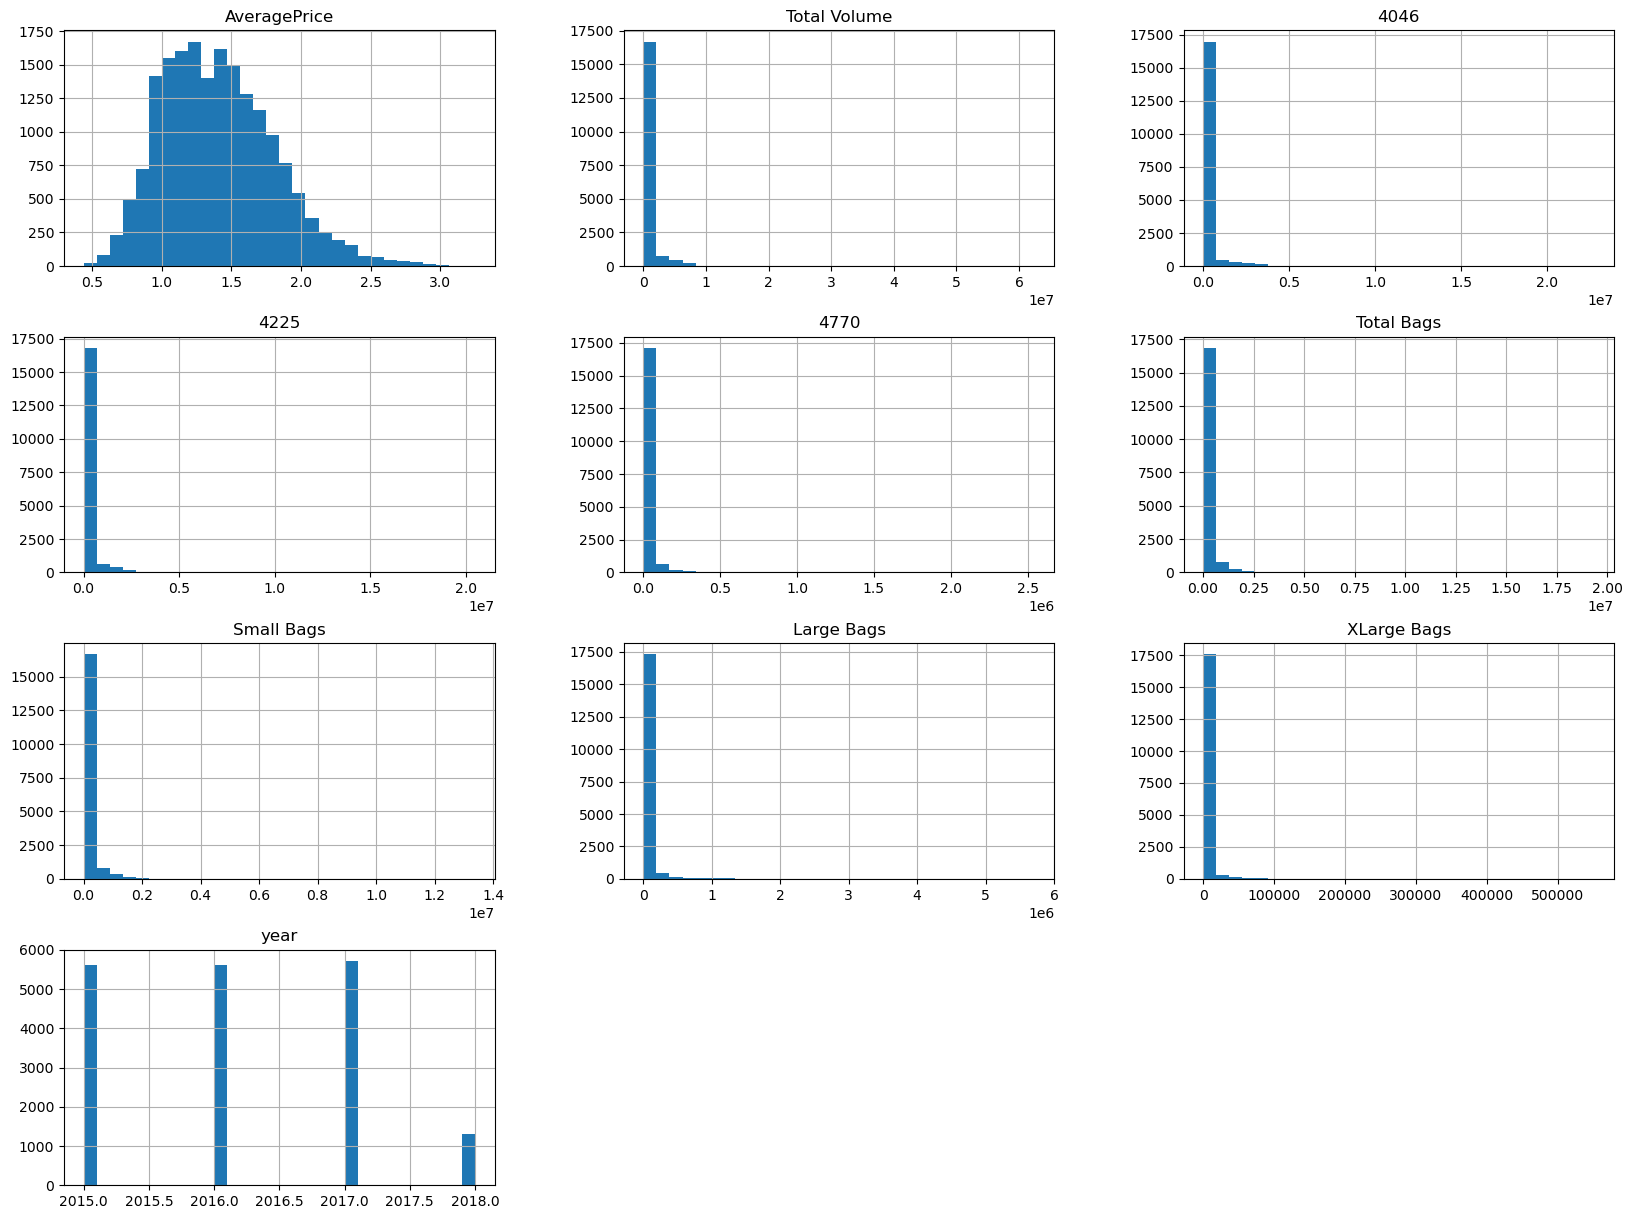

In [166]:
# Histogram
df.hist(bins=30,figsize=(20,15))

In [167]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [168]:
a_df=('AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags')

In [169]:
# Using logp1 method
for i in a_df:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [170]:
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
dtype: float64

array([[<Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>,
        <Axes: title={'center': '4046'}>],
       [<Axes: title={'center': '4225'}>,
        <Axes: title={'center': '4770'}>,
        <Axes: title={'center': 'Total Bags'}>],
       [<Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>,
        <Axes: title={'center': 'XLarge Bags'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >, <Axes: >]],
      dtype=object)

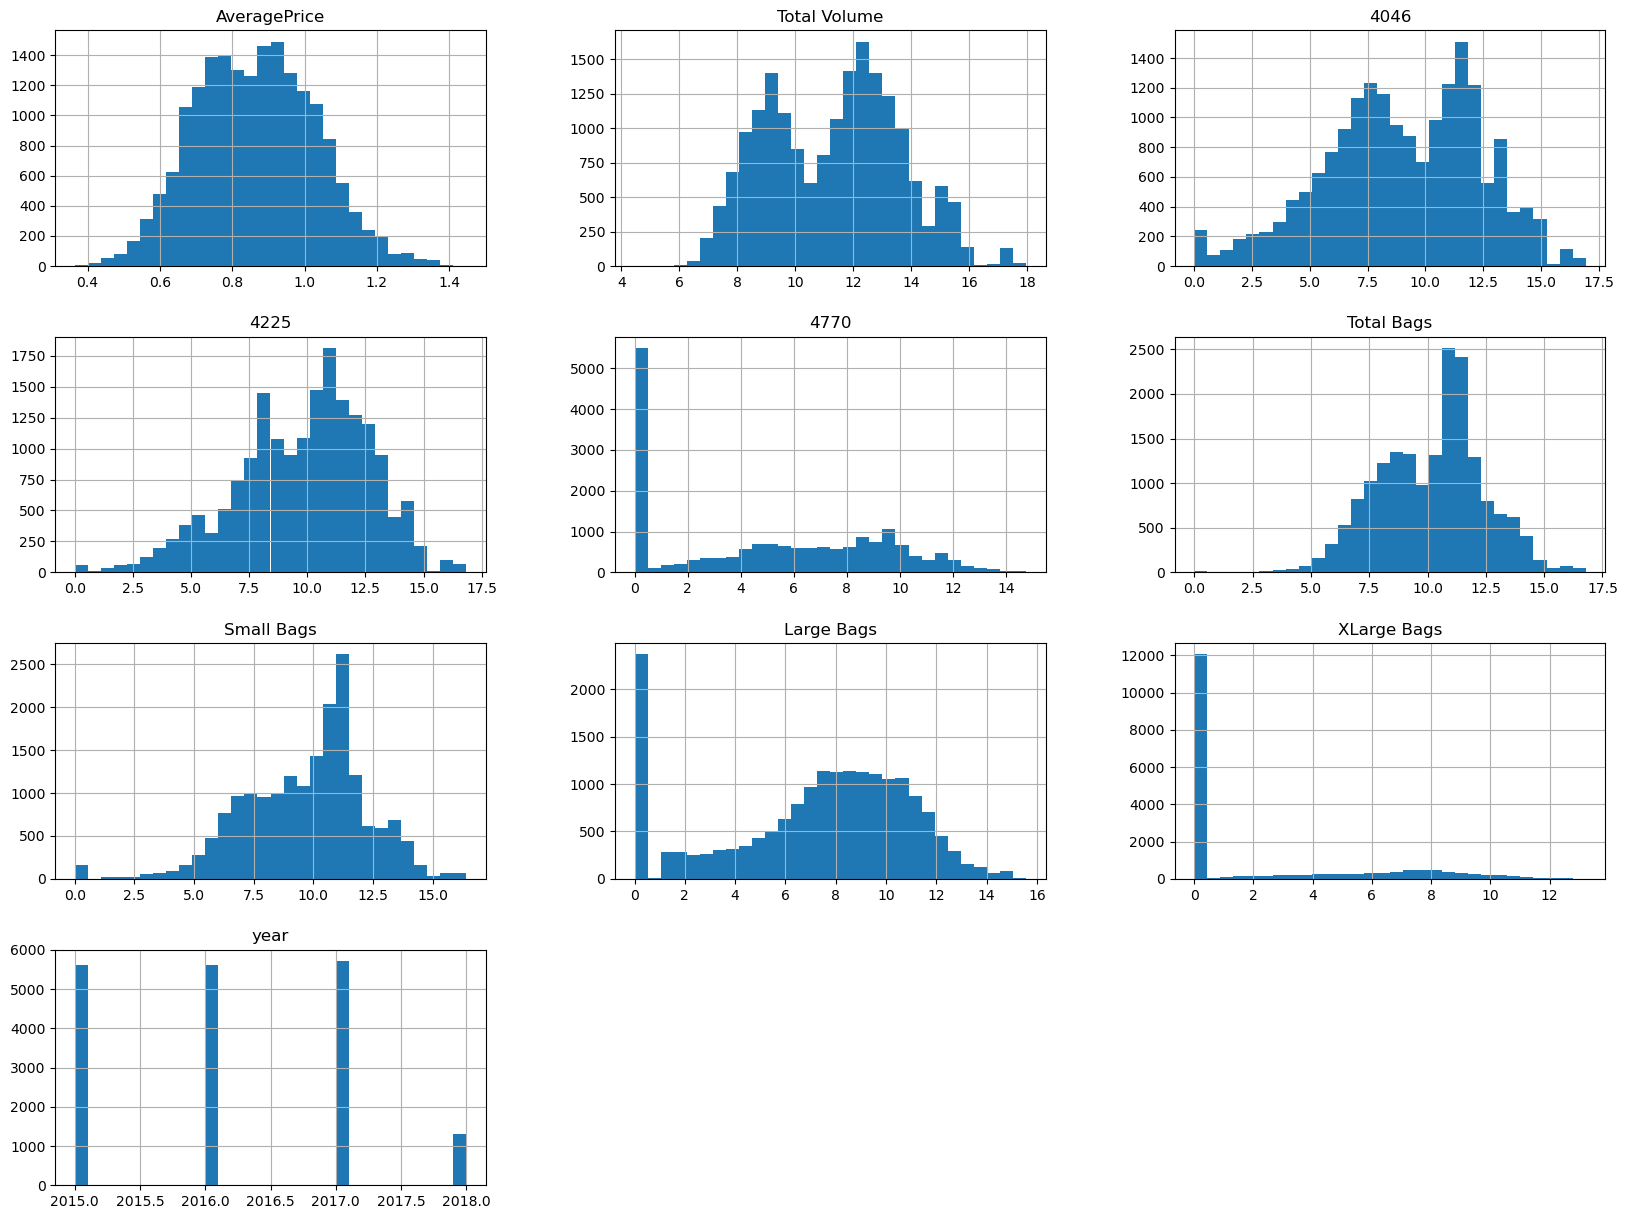

In [171]:
df.hist(bins=30,figsize=(20,15))

AveragePrice       Axes(0.125,0.53;0.110714x0.35)
Total Volume    Axes(0.257857,0.53;0.110714x0.35)
4046            Axes(0.390714,0.53;0.110714x0.35)
4225            Axes(0.523571,0.53;0.110714x0.35)
4770            Axes(0.656429,0.53;0.110714x0.35)
Total Bags      Axes(0.789286,0.53;0.110714x0.35)
Small Bags         Axes(0.125,0.11;0.110714x0.35)
Large Bags      Axes(0.257857,0.11;0.110714x0.35)
XLarge Bags     Axes(0.390714,0.11;0.110714x0.35)
year            Axes(0.523571,0.11;0.110714x0.35)
dtype: object

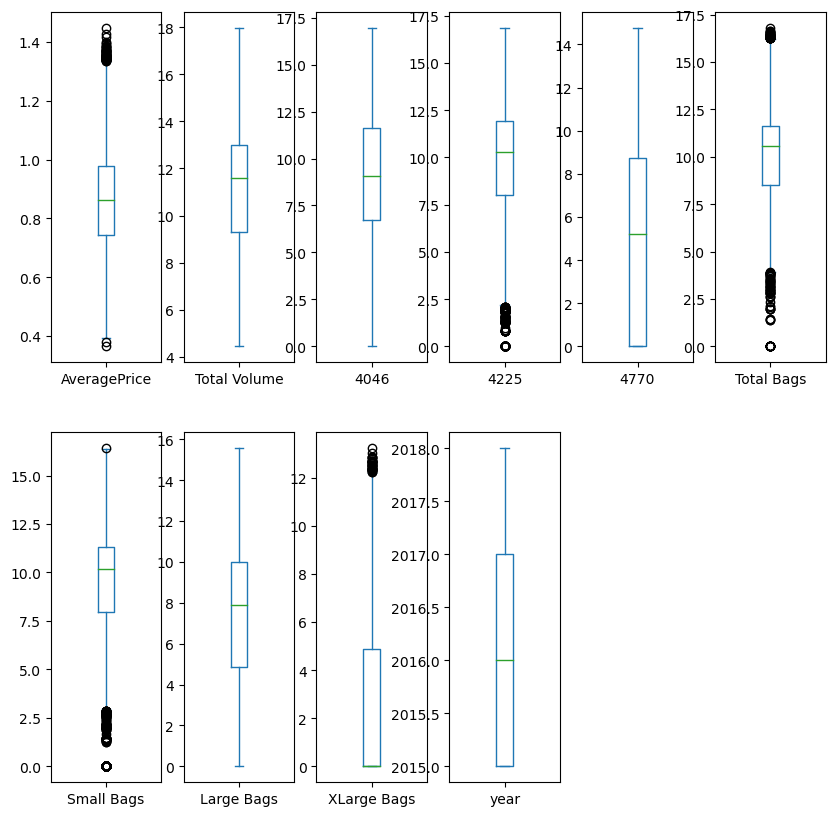

In [172]:
df.plot(kind='box',subplots=True ,layout=(2,6) ,figsize=(10,10))

In [173]:
df.replace({'type':{'conventional':0,'organic':1}},inplace=True)

In [174]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,Albany
1,20-12-2015,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,Albany
2,13-12-2015,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,Albany
3,06-12-2015,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,Albany
4,29-11-2015,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,Albany


In [175]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [176]:
df.replace({'region':{'Albany':1,'Atlanta':2,'BaltimoreWashington':3,'Boise':4,'Boston':5,'BuffaloRochester':6,'California':7,'Charlotte':8,'Chicago':9,'CincinnatiDayton':10,'Columbus':11,'DallasFtWorth':12,'Denver':13,'Detroit':14,'GrandRapids':15,'GreatLakes':16,'HarrisburgScranton':17,'HartfordSpringfield':18,'Houston':19,'Indianapolis':20,'Jacksonville':21,'LasVegas':22,'LosAngeles':23,'Louisville':24,'MiamiFtLauderdale':25,'Midsouth':26,'Nashville':27,'NewOrleansMobile':28,'NewYork':29,'Northeast':30,'NorthernNewEngland':31,'Orlando':32,'Philadelphia':33,'PhoenixTucson':34,'Pittsburgh':35,'Plains':36,'Portland':37,'RaleighGreensboro':38,'RichmondNorfolk':39,'Roanoke':40,'Sacramento':41,'SanDiego':42,'SanFrancisco':43,'Seattle':44,'SouthCarolina':45,'SouthCentral':46,'Southeast':47,'Spokane':48,'StLouis':49,'Syracuse':50,'Tampa':51,'TotalUS':52,'West':53,'WestTexNewMexico':54}},inplace=True)

In [177]:
df.sample(6)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16172,31-12-2017,0.891998,8.583382,5.374908,4.754969,0.000000,8.519602,8.492421,4.908233,0.0000,1,2017,28
9417,24-05-2015,1.029619,8.520779,3.527536,5.141196,0.000000,8.479491,8.479491,0.000000,0.0000,1,2015,6
11410,25-01-2015,0.993252,10.287244,8.835980,9.762161,2.119863,8.538761,6.118824,8.445843,0.0000,1,2015,44
12246,18-12-2016,0.959350,11.717737,9.798518,11.018541,5.180378,10.681733,10.542004,8.644814,0.0000,1,2016,7
913,07-06-2015,0.828552,12.775570,8.397653,12.547129,5.394809,11.120402,11.098225,7.301310,0.0000,0,2015,18
319,08-11-2015,0.683097,15.454310,14.656155,14.380236,12.285459,13.659602,13.608495,10.499765,8.7523,0,2015,7


In [178]:
# removing Date 
df.drop('Date',axis=1,inplace=True)

# Removing Outliers using Z score Method

In [179]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.111918,0.107282,0.609752,0.374936,0.279143,0.494074,0.247796,0.669747,0.645526,0.999836,1.221282,1.700252
1,0.060020,0.175949,0.737707,0.305200,0.233838,0.454761,0.213093,0.658279,0.645526,0.999836,1.221282,1.700252
2,1.255560,0.158690,0.688840,0.618892,0.042078,0.523041,0.273995,0.643743,0.645526,0.999836,1.221282,1.700252
3,0.801087,0.017121,0.583598,0.472808,0.181974,0.672335,0.409182,0.576571,0.645526,0.999836,1.221282,1.700252
4,0.243636,0.207558,0.638425,0.298852,0.171717,0.644845,0.388616,0.475393,0.645526,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.623491,0.685006,0.407310,0.878279,1.217613,0.299689,0.085548,0.272479,0.645526,1.000164,1.970504,1.700811
18245,0.805435,0.775077,0.568306,0.594835,1.217613,0.466102,0.232904,0.346517,0.645526,1.000164,1.970504,1.700811
18246,1.153743,0.778901,0.568251,0.712597,0.370548,0.459975,0.215422,0.872380,0.645526,1.000164,1.970504,1.700811
18247,1.279375,0.707798,0.494407,0.644192,0.370240,0.391424,0.155249,0.829787,0.645526,1.000164,1.970504,1.700811


In [180]:
threshold=3
print(np.where(z<3))

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))


In [181]:
dfnew=df[(z<3).all(axis=1)]

In [182]:
dfnew

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,1
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,1
2,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,1
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,1
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,54
18245,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,54
18246,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,54
18247,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,54


In [183]:
dfnew.shape

(17928, 12)

# Correalation

In [184]:
cor=df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.592833,-0.556817,-0.457034,-0.518407,-0.579452,-0.496176,-0.484128,-0.385735,0.621890,0.092480,-0.016902
Total Volume,-0.592833,1.000000,0.886538,0.908610,0.834274,0.934924,0.876670,0.671429,0.661647,-0.796481,0.086274,0.111673
4046,-0.556817,0.886538,1.000000,0.761893,0.747167,0.785653,0.741634,0.582992,0.585774,-0.720788,0.011078,0.191000
4225,-0.457034,0.908610,0.761893,1.000000,0.794104,0.790640,0.722492,0.614586,0.589352,-0.735619,0.014321,0.072366
4770,-0.518407,0.834274,0.747167,0.794104,1.000000,0.773176,0.747692,0.558938,0.643214,-0.782055,-0.040618,0.071842
Total Bags,-0.579452,0.934924,0.785653,0.790640,0.773176,1.000000,0.929040,0.709648,0.633930,-0.724031,0.222446,0.105552
Small Bags,-0.496176,0.876670,0.741634,0.722492,0.747692,0.929040,1.000000,0.526174,0.599928,-0.708089,0.202987,0.078192
Large Bags,-0.484128,0.671429,0.582992,0.614586,0.558938,0.709648,0.526174,1.000000,0.469564,-0.499925,0.193857,0.113016
XLarge Bags,-0.385735,0.661647,0.585774,0.589352,0.643214,0.633930,0.599928,0.469564,1.000000,-0.629273,0.168146,0.016701
type,0.621890,-0.796481,-0.720788,-0.735619,-0.782055,-0.724031,-0.708089,-0.499925,-0.629273,1.000000,-0.000032,-0.000280


<Axes: >

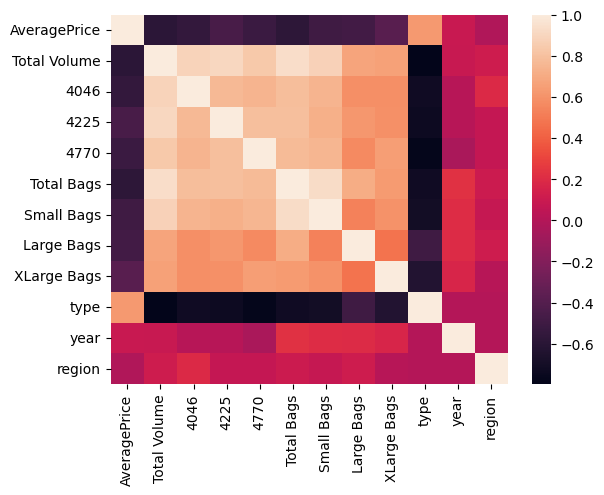

In [185]:
sns.heatmap(df.corr())

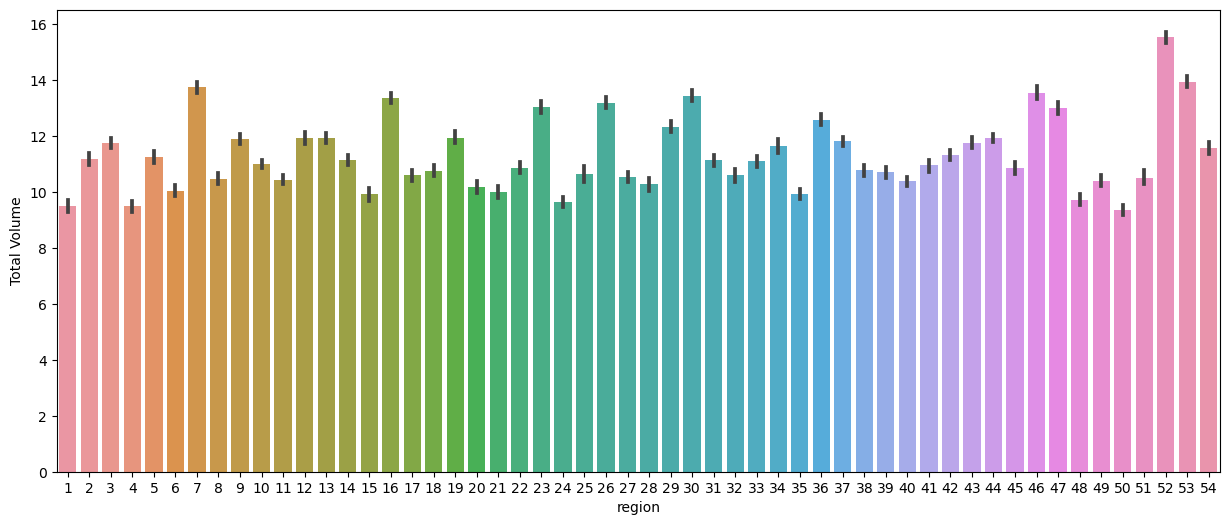

In [186]:
# Barplot in region with Total volume
plt.figure(figsize=(15,6))
sns.barplot(x='region', y='Total Volume',data=df)
plt.show()

# Machine Learning Model Building

In [187]:
import sklearn
from sklearn.model_selection import train_test_split

In [188]:
x=df.iloc[:,1:12]

In [189]:
y=df.iloc[:,0]

In [190]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,1
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,1
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,1
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,1
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,1
...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,54
18245,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,54
18246,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,54
18247,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,54


In [191]:
y

0        0.845868
1        0.854415
2        0.657520
3        0.732368
4        0.824175
           ...   
18244    0.966984
18245    0.996949
18246    1.054312
18247    1.075002
18248    0.963174
Name: AveragePrice, Length: 18249, dtype: float64

In [192]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=.30)

In [193]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12774, 11)
(12774,)
(5475, 11)
(5475,)


# Using Linear Regression

In [194]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [195]:
lr.coef_

array([-4.94331511e-02, -2.91169182e-05,  3.36870482e-02,  1.80553835e-03,
       -3.34393561e-02,  2.45593542e-02, -5.45022824e-03,  3.36702397e-03,
        1.52311087e-01,  3.12473331e-02,  4.53587497e-04])

In [196]:
lr.intercept_

-61.87036879845714

In [197]:
lrpred=lr.predict(x_test)
print("Predicted Value", lrpred)
print("Actual Value", y_test)

Predicted Value [0.79680171 0.68740137 0.93708199 ... 1.0856897  0.99344075 0.76040527]
Actual Value 8604     0.598837
2608     0.678034
14581    0.891998
4254     0.678034
16588    0.896088
           ...   
13173    0.970779
16853    0.662688
14016    1.258461
14802    1.050822
898      0.810930
Name: AveragePrice, Length: 5475, dtype: float64


In [198]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
print('Mean Squared Error:', mse(y_test, lrpred))
print('Mean Absolute Error:', mae(y_test, lrpred))
print('Root Mean Squared Error:', np.sqrt(mse(y_test, lrpred)))
print('R2 Score:', r2_score(y_test, lrpred))

Mean Squared Error: 0.013124971424841085
Mean Absolute Error: 0.09042695282975058
Root Mean Squared Error: 0.11456426766161029
R2 Score: 0.5142550492953833


# Random Forest Regressor

In [199]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=.20)

In [200]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14599, 11)
(14599,)
(3650, 11)
(3650,)


In [204]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
rfc=RandomForestRegressor()

In [205]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [213]:
pred=rfc.predict(x_test)

In [214]:
print('Mean Squared Error:', mse(y_test, pred))
print('Mean Absolute Error:', mae(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mse(y_test, pred)))
print('R2 Score:', r2_score(y_test, pred))

Mean Squared Error: 0.0038150001739943188
Mean Absolute Error: 0.044552560220876766
Root Mean Squared Error: 0.0617656876752321
R2 Score: 0.8584495501447649


In [215]:
# For region 
x=df.iloc[:,0:11]

In [217]:
y=df.iloc[:,11]

In [218]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015
2,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018
18245,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018
18246,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018
18247,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018


In [219]:
y

0         1
1         1
2         1
3         1
4         1
         ..
18244    54
18245    54
18246    54
18247    54
18248    54
Name: region, Length: 18249, dtype: int64

In [229]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14599, 11)
(14599,)
(3650, 11)
(3650,)


# Using Decision Tree Regressor

In [230]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [231]:
dtr_pred=dtr.predict(x_test)

In [232]:
print('Mean Squared Error:', mse(y_test, dtr_pred))
print('Mean Absolute Error:', mae(y_test, dtr_pred))
print('Root Mean Squared Error:', np.sqrt(mse(y_test, dtr_pred)))
print('R2 Score:', r2_score(y_test, dtr_pred))

Mean Squared Error: 109.34575342465753
Mean Absolute Error: 4.2005479452054795
Root Mean Squared Error: 10.456851984448166
R2 Score: 0.5486330078680783


# Saving Model

In [233]:
import joblib
joblib.dump(dtr,'Avocado.obj')

['Avocado.obj']